In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import datetime
import math

In [2]:
import tensorflow
import keras

Using TensorFlow backend.


In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("appstore_games.csv")

In [5]:
df_dt = df[['Name','Average User Rating','User Rating Count','Price',
            'In-app Purchases', 'Developer', 'Age Rating','Languages',
            'Size', 'Genres', 'Original Release Date', 'Current Version Release Date']]

In [6]:
df_dt.loc[df_dt['In-app Purchases'].isnull(), 'In-app Purchases'] = 0

C:\Users\Tanvy\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
df.head(10)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


In [8]:
for i in range(len(df_dt)):
    try:
        lang = df_dt.at[i, 'Languages']
        langs = lang.split(',')
        for l in langs:
            df_dt.at[i, l] = 1
    except:
        pass

C:\Users\Tanvy\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [9]:
df_dt.columns

Index(['Name', 'Average User Rating', 'User Rating Count', 'Price',
       'In-app Purchases', 'Developer', 'Age Rating', 'Languages', 'Size',
       'Genres',
       ...
       ' QU', ' SU', ' TT', ' TI', ' TO', ' UG', ' YI', 'IT', ' MI', ' XH'],
      dtype='object', length=151)

In [10]:
for i in range(len(df_dt)):
    try:
        gen = df_dt.at[i, 'Genres']
        gens = gen.split(',')
        for g in gens:
            df_dt.at[i, g] = 1
    except:
        pass

In [11]:
for col in df_dt.columns:
    df_dt.loc[df_dt[col].isnull(), col] = 0

In [12]:
del(df_dt["Languages"])
del(df_dt["Genres"])

In [13]:
for i in range(len(df_dt)):
    a = df_dt.at[i, 'In-app Purchases']
    if a != 0:
        a = a.split(',')
        a = [float(x) for x in a]
        a = sum(a)
    df_dt.at[i, 'In-app Purchases'] = a

In [14]:
for i in range(len(df_dt)):
    rat = df_dt.at[i, 'Age Rating']
    rat = re.findall(r'\d+', rat)[0]
    df_dt.at[i, 'Age Rating'] = int(rat)

In [15]:
df_dt

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Size,Original Release Date,Current Version Release Date,...,People,Shopping,Kids & Family,Art,Food & Drink,Shopping,Places & Objects,Navigation,Weather,Magazines & Newspapers
0,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4,15853568.0,11/07/2008,30/05/2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4,12328960.0,11/07/2008,17/05/2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Morocco,3.0,8376.0,0.00,0,Bayou Games,4,674816.0,11/07/2008,5/09/2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sudoku (Free),3.5,190394.0,0.00,0,Mighty Mighty Good Games,4,21552128.0,23/07/2008,30/05/2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senet Deluxe,3.5,28.0,2.99,0,RoGame Software,4,34689024.0,18/07/2008,22/07/2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Sudoku - Classic number puzzle,3.0,47.0,0.00,1.99,OutOfTheBit Ltd,4,48672768.0,30/07/2008,29/04/2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Gravitation,2.5,35.0,0.00,0,Robert Farnum,4,6328320.0,30/07/2008,14/11/2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Colony,2.5,125.0,0.99,0,Chris Haynes,4,64333824.0,3/08/2008,3/10/2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Carte,2.5,44.0,0.00,0,Jean-Francois Pautex,4,2657280.0,3/08/2008,23/11/2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"""Barrels O' Fun""",2.5,184.0,0.00,0,BesqWare,4,1466515.0,1/08/2008,1/08/2008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
del(df_dt["Name"])
del(df_dt["Developer"])

In [17]:
del(df_dt["Original Release Date"]) 
del(df_dt["Current Version Release Date"])

In [18]:
Y = df_dt["Average User Rating"]
Y = Y.values

In [19]:
del(df_dt["Average User Rating"])

In [20]:
X = df_dt.iloc[:, 0:213].values

In [21]:
X

array([[3553.0, 2.99, 0, ..., 0.0, 0.0, 0.0],
       [284.0, 1.99, 0, ..., 0.0, 0.0, 0.0],
       [8376.0, 0.0, 0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 63.970000000000006, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [22]:
df_dt.head()

,User Rating Count,Price,In-app Purchases,Age Rating,Size,DA,NL,EN,FI,FR,...,People,Shopping,Kids & Family,Art,Food & Drink,Shopping,Places & Objects,Navigation,Weather,Magazines & Newspapers
0,3553.0,2.99,0,4,15853568.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,284.0,1.99,0,4,12328960.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8376.0,0.00,0,4,674816.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,190394.0,0.00,0,4,21552128.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.0,2.99,0,4,34689024.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
standScale = StandardScaler()
X          = standScale.fit_transform(X)

In [24]:
X.shape

(17007, 212)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [26]:
from keras import layers
from keras import models

In [81]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(212,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer = 'rmsprop',
              loss      = 'mse',
              metrics   = ['mae'])

In [82]:
history = model.fit(X_train, Y_train,
                   validation_data = (X_test, Y_test),
                   epochs          = 20,
                   batch_size      = 512, 
                   verbose         = 0)

In [83]:
history_dict = history.history

In [84]:
epochs = [x for x in range(1, 21)]

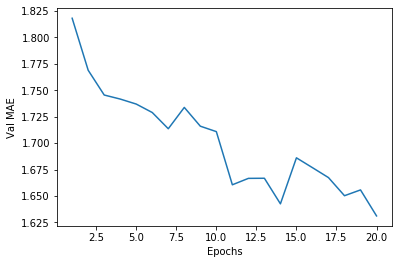

In [85]:
plt.plot(epochs, history_dict['val_mean_absolute_error'])
plt.xlabel("Epochs")
plt.ylabel("Val MAE")
plt.show()

In [86]:
history = model.fit(X_train, Y_train,
                   validation_data = (X_test, Y_test),
                   epochs          = 13,
                   batch_size      = 512, 
                   verbose         = 0)

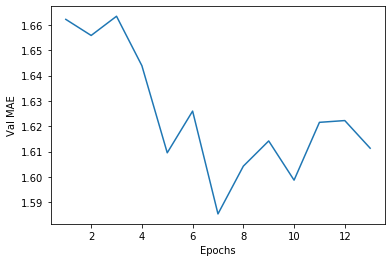

In [87]:
history_dict = history.history
epochs = [x for x in range(1, 14)]
plt.plot(epochs, history_dict['val_mean_absolute_error'])
plt.xlabel("Epochs")
plt.ylabel("Val MAE")
plt.show()

In [88]:
test_mse_score, test_mae_score = model.evaluate(X_test, Y_test)

4252/4252 [==============================] - 0s 77us/step


In [89]:
test_mse_score

3.5315175583535283

In [90]:
test_mae_score

1.6113054464139247

In [91]:
pred_Y = model.predict(X_test)

In [92]:
maee = []

In [93]:
for i in range(len(pred_Y)):
    maee.append((abs(Y_test[i]-pred_Y[i][0]))/100)
sum(maee)/len(maee)

0.016113054359354506